In [84]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
from data_clean import trimnoise, low_pass_fliter

In [145]:
df = pd.read_csv('testWalk1.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.rename(columns={'Speed (m/s)': "speed"})
df = df.drop(df[df.Latitude == 0.0].index)

In [146]:
df['v3'] = df.apply(lambda row: (row['ax']**2 + row['ay']**2 + row['az']**2)**0.5, axis=1)

In [148]:
groupSize = 12
grouped = df.groupby(df.index // groupSize)
df_grouped = grouped.mean()
df_grouped = df_grouped[['v3']]

In [152]:
df_grouped['v3_f'] = low_pass_fliter(df_grouped['v3'])

In [155]:
from scipy import signal
x = df_grouped['v3_f'][2000:2100].to_numpy()
peaks,_ = signal.find_peaks(x)
len(peaks)

28

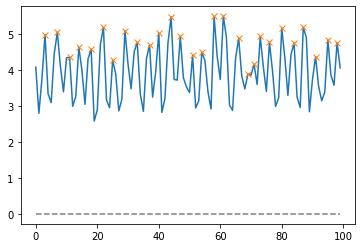

In [156]:

plt.plot(x)
plt.plot(peaks, x[peaks], "x")

plt.plot(np.zeros_like(x), "--", color="gray")

plt.show()

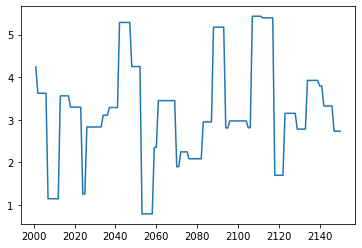

In [107]:
plt.plot(df['v3'][2000:2150])

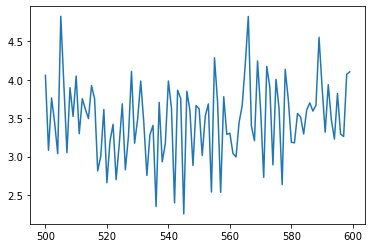

In [92]:
plt.plot(df_grouped['v3_f'][500:600])

In [93]:
fft_values = fft(df_grouped['v3'].to_numpy())

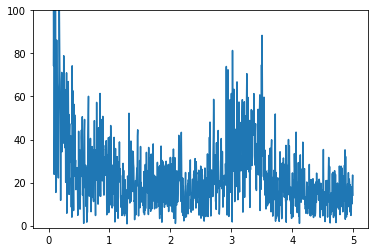

In [95]:
x = fftfreq(fft_values.size, 0.1)
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([-1,100])
plt.plot(x[:x.size//2], abs(fft_values)[:fft_values.size//2])


In [15]:
df_grouped['v3_fft'][1000:1100]

1000    29.385858+6.148832j
1001   -2.792928-24.491701j
1002    -8.612391+7.064743j
1003     1.378083+7.046461j
1004    9.889780-16.740020j
               ...         
1095   -13.990811-1.797766j
1096    14.113216-2.655857j
1097     0.139756+4.969218j
1098    2.166268-11.438158j
1099     7.704669-8.313030j
Name: v3_fft, Length: 100, dtype: complex128

In [50]:
freq = fftfreq(fft_values.size, 0.3)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


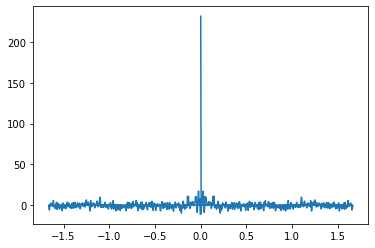

In [51]:
plt.plot(freq, fft_values)

In [125]:
df['time'].diff().sum()

831.1099999999999

In [120]:
df_filtered['time']

1          NaN
2          NaN
3       -0.001
4        0.000
5        0.000
         ...  
69292   -0.022
69293    0.052
69294   -0.052
69295    0.000
69296    0.000
Name: time, Length: 69296, dtype: float64